In [62]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data = pd.read_csv("ecommerce_shipping.csv")
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [64]:
label_encoder = LabelEncoder()
cateogical_feature_name = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for feature_name in cateogical_feature_name:
    data[feature_name] = label_encoder.fit_transform(data[feature_name])
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,5,2,0,1,1538,1
10995,10996,1,2,4,1,232,5,2,0,6,1247,0
10996,10997,2,2,5,4,242,5,1,0,4,1155,0
10997,10998,4,2,5,2,223,6,2,1,2,1210,0


In [65]:
data.drop(['ID'], axis=1, inplace=True)
data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5,2,0,1,1538,1
10995,1,2,4,1,232,5,2,0,6,1247,0
10996,2,2,5,4,242,5,1,0,4,1155,0
10997,4,2,5,2,223,6,2,1,2,1210,0


In [66]:
X = data.drop("Reached.on.Time_Y.N", axis=1)
y = data["Reached.on.Time_Y.N"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
accuracy=[]
best_score = 0
besk_param = 0


In [68]:
for depth in range(2, 12):
    model = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    model = model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    score=accuracy_score(y_test, y_pred)
    print("depth:", depth, "\tAccuracy: ", score)
    accuracy.append(score)
    if(best_score<score):
        best_score=score
        best_param=depth
print("best_param: ", best_param, "\tbest_score: ", best_score)

depth: 2 	Accuracy:  0.666969696969697
depth: 3 	Accuracy:  0.6733333333333333
depth: 4 	Accuracy:  0.6763636363636364
depth: 5 	Accuracy:  0.6815151515151515
depth: 6 	Accuracy:  0.6827272727272727
depth: 7 	Accuracy:  0.6806060606060607
depth: 8 	Accuracy:  0.6803030303030303
depth: 9 	Accuracy:  0.6809090909090909
depth: 10 	Accuracy:  0.6718181818181819
depth: 11 	Accuracy:  0.6784848484848485
best_param:  6 	best_score:  0.6827272727272727


In [69]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=best_param)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [70]:
with open("decistion_tree.log", "w") as file:
    file.write(tree.export_text(model))

In [71]:
target_feature = 'Reached.on.Time_Y.N' # resulting target
target_range = [0, 1] # range of target
other_feature = ['Warehouse_block', 
                'Mode_of_Shipment',
                'Customer_care_calls',
                'Customer_rating',
                'Cost_of_the_Product',
                'Prior_purchases',
                'Product_importance',
                'Gender',
                'Discount_offered',
                'Weight_in_gms'
                 ]

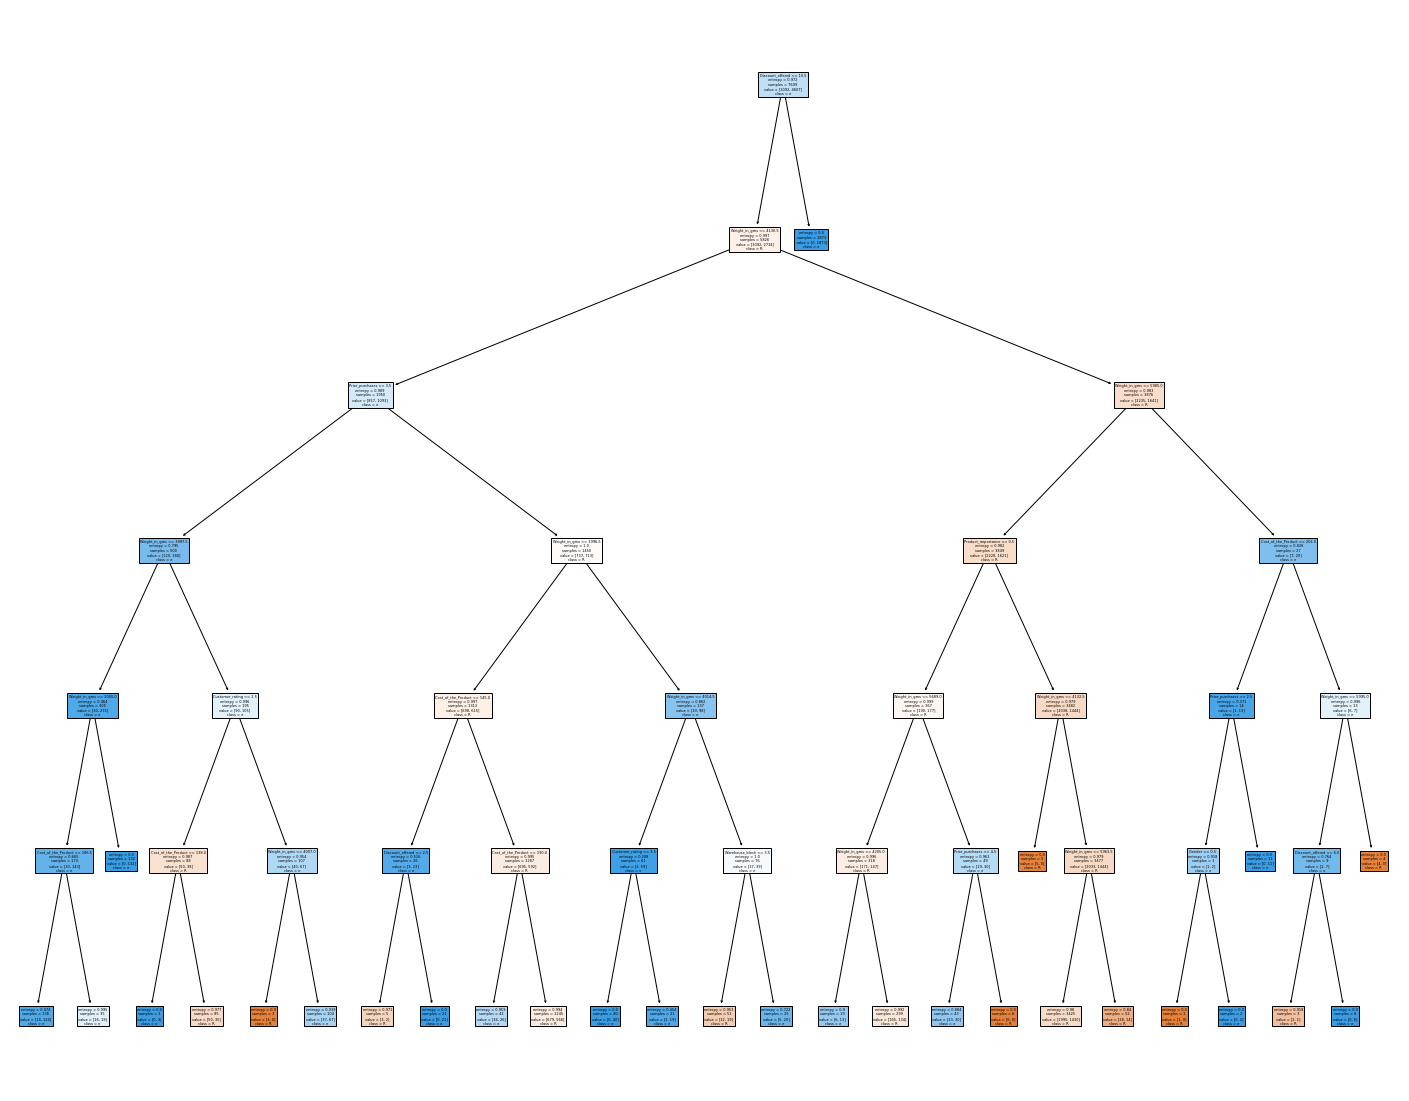

In [72]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=other_feature,  
                   class_names=target_feature,
                   filled=True)